In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [4]:
#ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS: proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: nitric oxides concentration (parts per 10 million)
#RM: average number of rooms per dwelling
#AGE: proportion of owner-occupied units built prior to 1940
#DIS: weighted distances to ﬁve Boston employment centers
#RAD: index of accessibility to radial highways
#TAX: full-value property-tax rate per $10,000
#PTRATIO: pupil-teacher ratio by town 12. 
#B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 
#LSTAT: % lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [7]:
df = pd.read_csv("../Datasets/housing.csv", header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
def plot_histogram(df,prefix=""):
    import math
    numeric_columns=[col for col in df.columns if df[col].dtype != "O"]
    n_columns = 3
    n_rows = math.ceil(len(numeric_columns)/n_columns)
    plt.figure(figsize=(n_columns*5,n_rows*4))
    for i,col in enumerate(numeric_columns,start=1):
        plt.subplot(n_rows,n_columns,i)
        sns.histplot(df[col],bins=30,kde=True)
        plt.title(prefix+col)
        plt.xlabel("")
        plt.ylabel("")
    plt.tight_layout()
    plt.show()

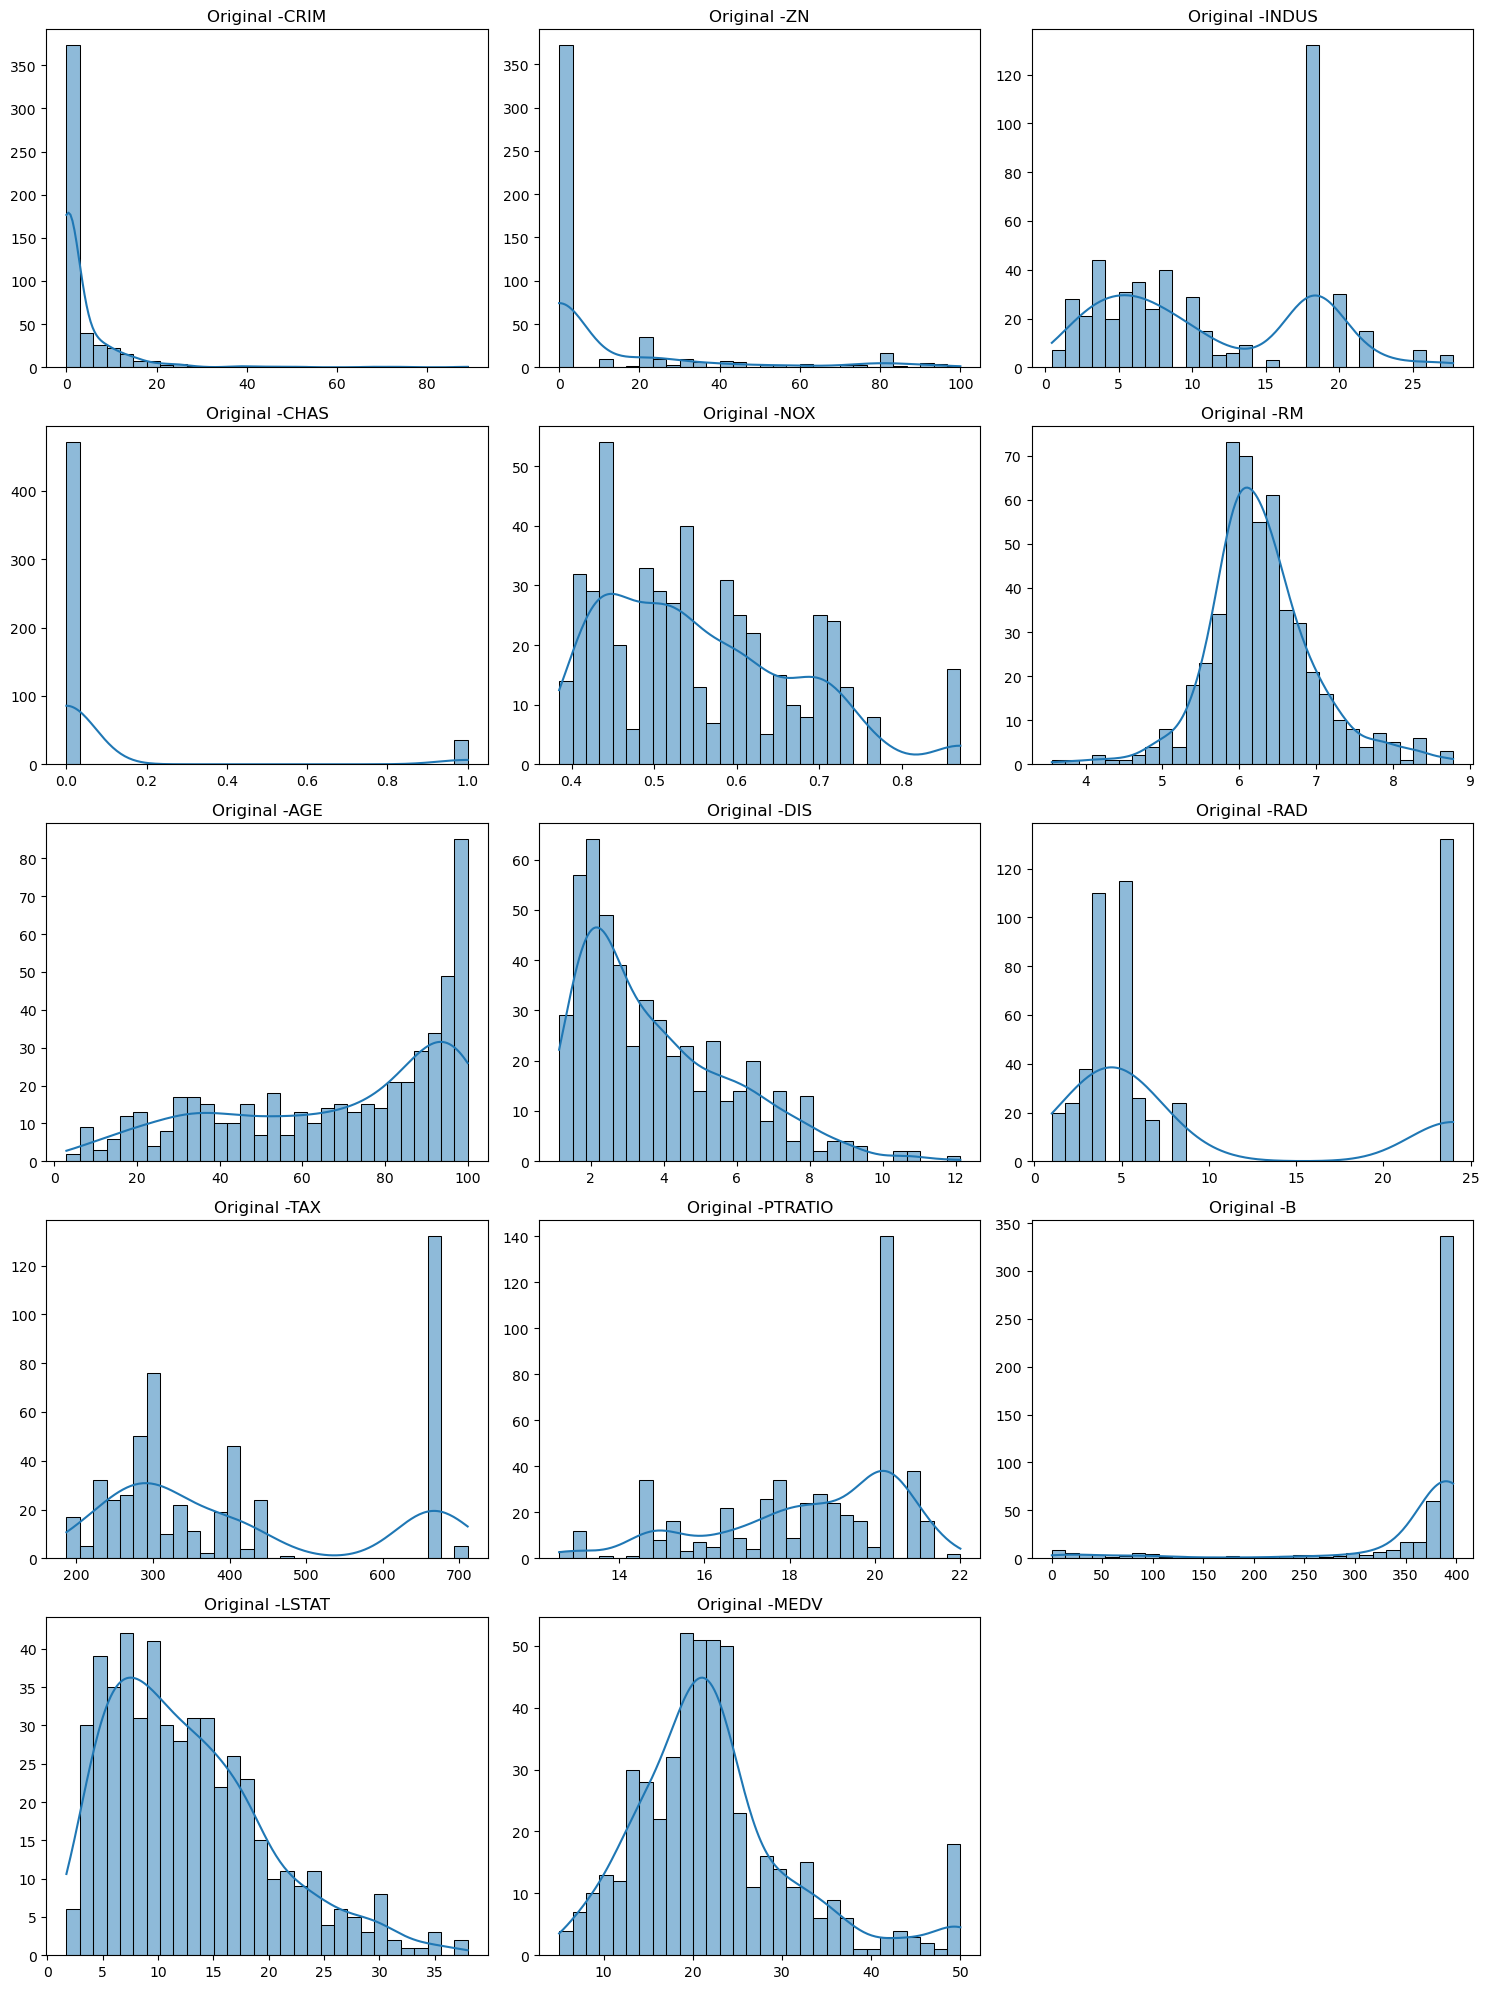

In [52]:
plot_histogram(df,prefix="Original -")

In [53]:
from scipy.stats import skew
df.apply(skew).sort_values(ascending=False) # pozitif ise sola yatık negati fise sağa yatık

CRIM       5.207652
CHAS       3.395799
ZN         2.219063
MEDV       1.104811
DIS        1.008779
RAD        1.001833
LSTAT      0.903771
NOX        0.727144
TAX        0.667968
RM         0.402415
INDUS      0.294146
AGE       -0.597186
PTRATIO   -0.799945
B         -2.881798
dtype: float64

In [54]:
X = df.drop("MEDV",axis=1)
y = df["MEDV"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [55]:
from sklearn.preprocessing import PowerTransformer

In [56]:
pw_transformer = PowerTransformer(method="yeo-johnson")

In [57]:
X_train_transformed = pw_transformer.fit_transform(X_train)
X_test_transformed = pw_transformer.transform(X_test)

In [58]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed,columns=X_train.columns)

In [59]:
X_train_transformed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.631565,-0.590377,1.165899,3.934242,0.603847,2.850970,0.923289,-0.783581,-0.249733,0.285349,-1.551111,0.372664,-1.765760
1,-0.439517,-0.590377,-0.604715,-0.254179,-0.323588,1.930186,-1.688506,0.090098,0.339318,-0.449916,-0.676476,0.051259,-1.556039
2,-0.952095,-0.590377,-0.962076,-0.254179,-0.976375,0.146485,-0.799674,0.748429,-0.940019,-1.125131,-0.167340,0.638959,-0.231670
3,-0.870266,1.720044,-1.218228,-0.254179,-1.136052,1.249449,-1.089798,0.664243,-0.249733,0.254049,-1.423510,0.638959,-1.122409
4,-0.353847,-0.590377,-0.388749,-0.254179,-0.444535,-0.344716,-0.736576,0.725799,-0.249733,-0.650236,0.451119,0.638959,-0.589109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,1.674923,-0.590377,1.016528,-0.254179,1.067508,1.424313,1.090405,-1.742686,1.468389,1.376469,0.840108,0.638959,0.339550
375,-0.387538,-0.590377,1.385954,-0.254179,0.747169,-0.656864,0.985677,-0.521083,-0.546625,0.483096,1.578451,0.380007,0.539571
376,1.375846,-0.590377,1.016528,-0.254179,1.202429,0.168932,1.010727,-1.281053,1.468389,1.376469,0.840108,0.638959,1.009878
377,-0.635112,1.659658,-0.671081,-0.254179,-1.218451,-0.968581,-0.014643,1.637947,0.177721,-0.243449,0.155474,0.393501,0.918915


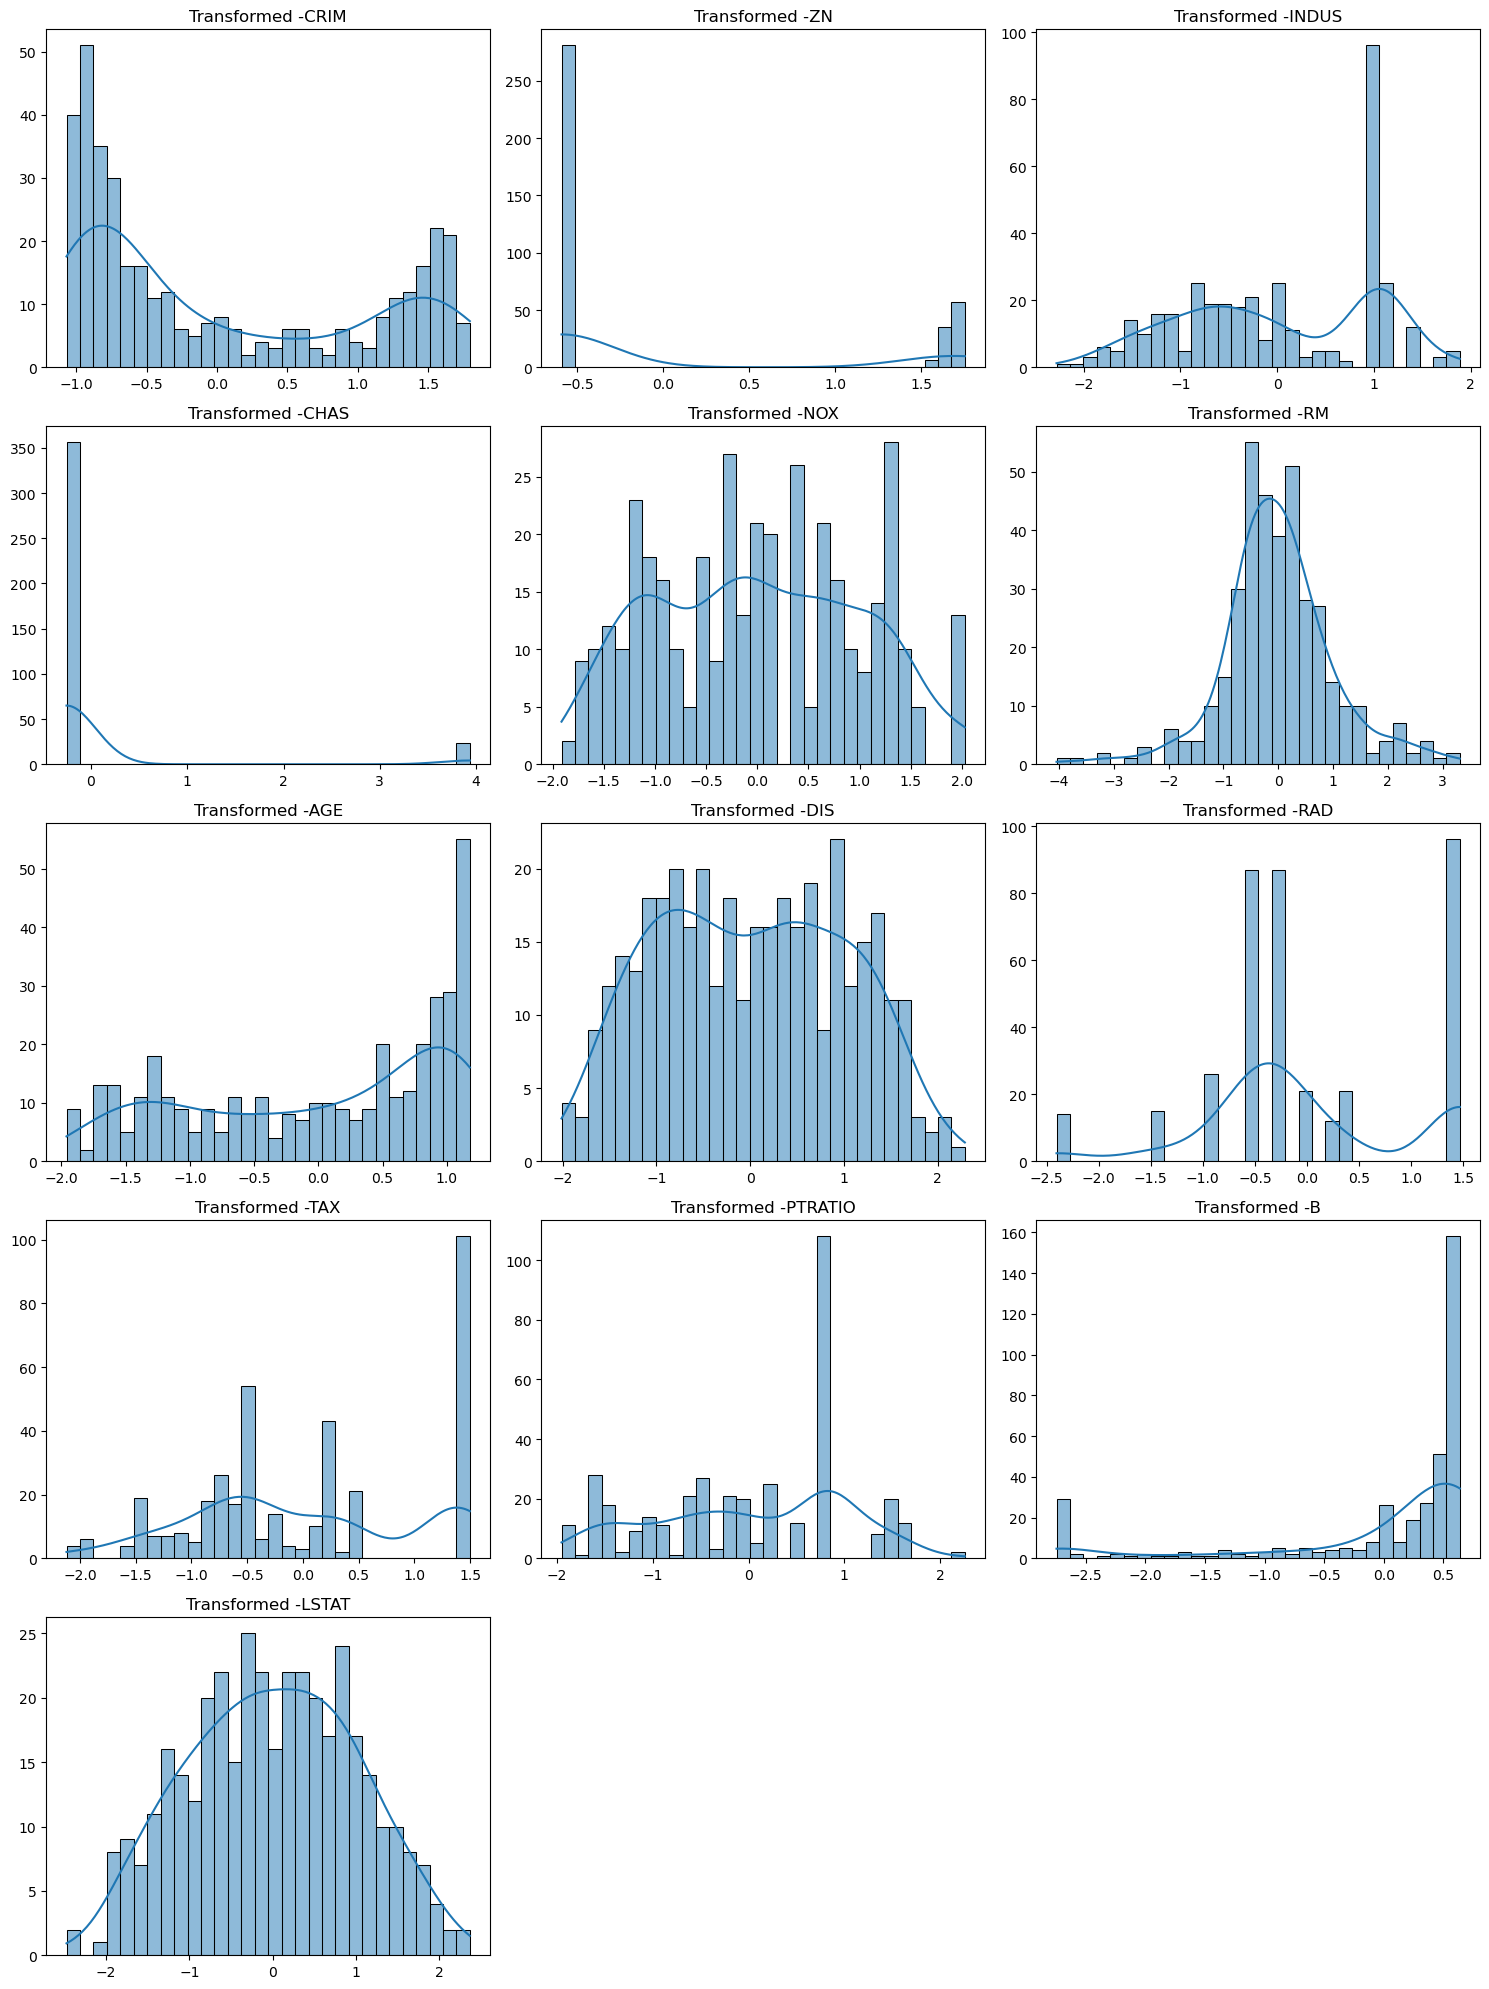

In [60]:
plot_histogram(X_train_transformed,prefix="Transformed -")

In [63]:
from scipy.stats import boxcox
y_train_transformed,lambda_value = boxcox(y_train) # inverse transform yapabilelim diye bir de lambda hesaplar

In [64]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model_lineer = LinearRegression()
model_lineer.fit(X_train_transformed,y_train_transformed)

LinearRegression()

In [67]:
y_pred_transformed = model_lineer.predict(X_test_transformed)
y_preds = inverse_boxcox(y_pred_transformed,lambda_value)
print(f"R2 : {r2_score(y_test,y_preds)}")

R2 : 0.7455685667043923


In [68]:
model_lineer1 = LinearRegression()
model_lineer1.fit(X_train,y_train)

LinearRegression()

In [69]:
y_preds = model_lineer1.predict(X_test)
print(f"R2 : {r2_score(y_test,y_preds)}")

R2 : 0.6850106699596983


In [72]:
df.to_csv("Boston House Prices.csv",index=False)